# Project: Clusering Mall customers data.

## Table of Contents

<ul>
<li><a href="#PS">Problem Statement</a></li>
<li><a href="#DG">Data Gathering</a></li>
<li><a href="#DW">Data Wrangling</a></li>
<li><a href="#DC">Data Clustering</a></li>
<li><a href="#C">Conclusion</a></li>
</ul>

<a id="PS"></a>
# Problem Statement.
> Clustering the Mall Customers data based on their Annual Income and Spending Score

<a id="DA"></a>
# Data Gathering.

In [1]:
#importing our packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#reading the data
dataset = pd.read_csv('E:\\Basics of ML & Python\\Mall_Customers.csv')
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


<a id="DW"></a>
# Data Wrangling.

In [3]:
#let's check on the missing values of the data and the type of series that we have
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#We will be dropping CustomerID, Gender and Age as we are not going to use them
data = dataset.iloc[:,[3,4]]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Great!, our dataset looks pretty clean and we don't need to handle any of the cleaning issues

<a id="DC"></a>
# Clustering the data using KMeans Algorithm.

> KMeans algorithm is an algorithm that clusters the data points based on the mean of the most closed data points. First initiates a random centroids then calculating the mean of the closed points and reassign the centroids again based on the new calculated mean.

In [5]:
#Importing KMeans
from sklearn.cluster import KMeans

### Know we need to identify the most appropriate number of the clusters that we can use to fit our data perfectly

> So we are going to iterate over the process of fitting the data with different number of clusters, then we will plot the inertia toget the optimum number of clusters

In [6]:
#iterating over the range 1-11
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init='k-means++', random_state=0)
    km.fit(data)
    clusters.append(km.inertia_)
clusters

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049434,
 20736.679938924124]

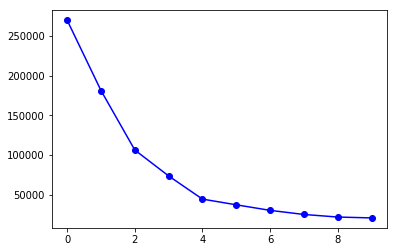

In [7]:
#plotting the inertia
plt.plot(clusters,'bo-');

### Looks like 6 is the most appropriate number of clusters to use.

In [8]:
#clustering the data using 6 clusters
Kmeans = KMeans(n_clusters=6)
x_clusters = Kmeans.fit_predict(data)
x_clusters

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1,
       4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

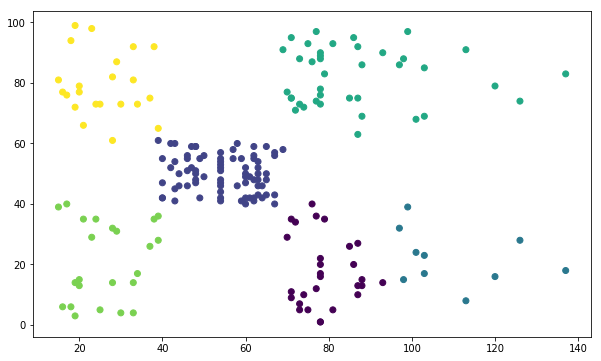

In [9]:
#plotting the data using "Annual Income (k$)" on X-axis and "Spending Score (1-100)" on Y-axis
plt.figure(figsize=(10,6))
plt.scatter(x = data.iloc[:,0], y = data.iloc[:,1], c= x_clusters);

<a id="C"></a>
# Conclusion.

> Awesome! we've clustered our data properly and we could have used 5 clusters rather than 6 or even 7 but 6 is fitting the data the most.

In [10]:
#adding the column of clusters to the dataset
data['x_clusters'] = x_clusters

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
data.head(10)

,Annual Income (k$),Spending Score (1-100),x_clusters
0,15,39,4
1,15,81,5
2,16,6,4
3,16,77,5
4,17,40,4
5,17,76,5
6,18,6,4
7,18,94,5
8,19,3,4
9,19,72,5
